# Classifying Airplane Accidents Based on Severity

## Context

We approached this challenge as if we were hired by the [Aviation Safety Network](https://aviation-safety.net) (ASN) in conjunction with the [Flight Safety Foundation](https://flightsafety.org) to investigate which factors contributed to the increase in flight-related fatalities during 2018. Despite 2018 being one of the safest years on record for commercial aviation, there was a 50% increase in incidents from 2017 resulting in more than a 1000% increase in fatalities. With the information provided, we will be able to advise the ASN on how to potentially minimize the severity of a given airline crash. 

[Data Source](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/machine-learning/how-severe-can-an-airplane-accident-be-03e7a3f1/)

## Goals

We want to predict the severity of an airplane accident based on several features:
    - Number of days since inspection 
    - Total safety complains
    - An estimation of how much control the pilot had during the incident
    - Turbulence
    - Cabin temperature
    - Accident type
    - Max elevation achieved
    - Number of prior violations
    - Safety score (a measure of how safe the plane was deemed to be)
    
Our target variable is Severity. The Severity feature ranks the severity of each airplane accident one a scale of low damage with few/no injuries (Minor_Damage_And_Injuries) to high damage with fatalities (Highly_Fatal_And_Damaging). 

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

from data_cleaning import *

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid")

## Dataframe

#### Column Descriptors

Accident_ID: unique id assigned to each row

Accident_Type_Code: the type of accident (factor, not numeric)

Cabin_Temperature: the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident

Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints: number of complaints from mechanics prior to the accident

Days_Since_Inspection: how long the plane went without inspection before the incident

Safety_Score: a measure of how safe the plane was deemed to be

Violations: number of violations that the aircraft received during inspections

Severity: a description (4 level factor) on the severity of the crash

Max_Elevation: maximum elevation achieved

Adverse_Weather_Metric: a measure of adverse weather

In [2]:
# load in dataframe
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [20]:
df_train.describe()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.526600,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,1.168173,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,1.000000,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,2.000000,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,4.000000,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,4.000000,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


## Feature Variable Distributions 

We plotted the distributions of all of the features we planned to measure. 

Text(0.5, 0, 'Adverse Weather Metric')

<Figure size 432x288 with 0 Axes>

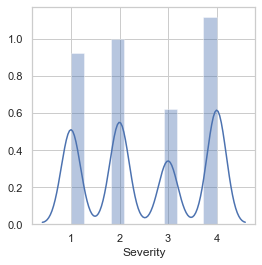

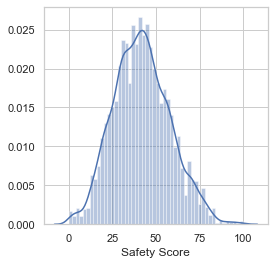

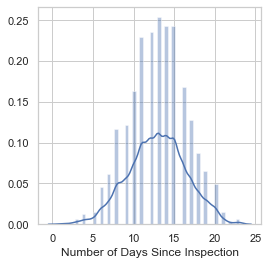

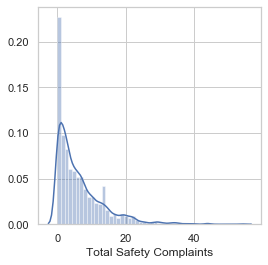

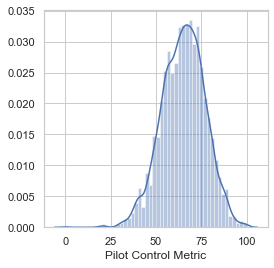

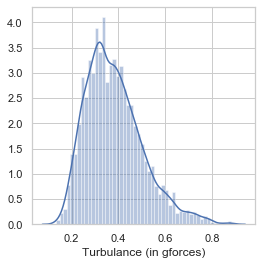

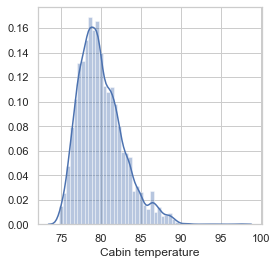

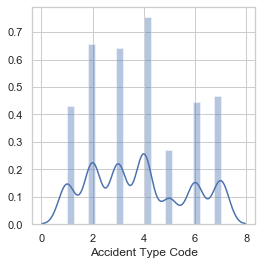

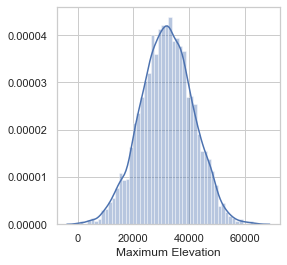

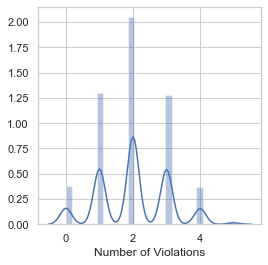

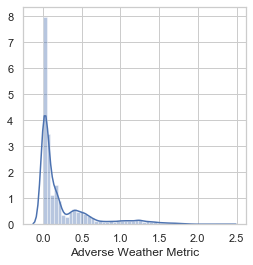

In [3]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.figure(figsize=(4, 4))
fig1 = sns.distplot(df_train.Severity)
plt.xlabel('Severity')

plt.figure(figsize=(4, 4))
fig2 = sns.distplot(df_train.Safety_Score);
plt.xlabel('Safety Score')

plt.figure(figsize=(4, 4))
fig3 = sns.distplot(df_train.Days_Since_Inspection);
plt.xlabel('Number of Days Since Inspection')

plt.figure(figsize=(4, 4))
fig4 = sns.distplot(df_train.Total_Safety_Complaints);
plt.xlabel('Total Safety Complaints')

plt.figure(figsize=(4, 4))
fig5 = sns.distplot(df_train.Control_Metric);
plt.xlabel('Pilot Control Metric')

plt.figure(figsize=(4, 4))
fig6 = sns.distplot(df_train.Turbulence_In_gforces);
plt.xlabel('Turbulance (in gforces)')

plt.figure(figsize=(4, 4))
fig7 = sns.distplot(df_train.Cabin_Temperature);
plt.xlabel('Cabin temperature')

plt.figure(figsize=(4, 4))
fig8 = sns.distplot(df_train.Accident_Type_Code);
plt.xlabel('Accident Type Code')

plt.figure(figsize=(4, 4))
fig9 = sns.distplot(df_train.Max_Elevation);
plt.xlabel('Maximum Elevation')

plt.figure(figsize=(4, 4))
fig10 = sns.distplot(df_train.Violations);
plt.xlabel('Number of Violations')

plt.figure(figsize=(4, 4))
fig11 = sns.distplot(df_train.Adverse_Weather_Metric);
plt.xlabel('Adverse Weather Metric')

# Modeling

We will try a few different modeling methods to see which one produces the most accurate results:

- Logistic regression
- Basic decision tree classifier, bagged
- Random forest


### Logistic Regression 

Logistic regression is a basic predictive model. We will start with this and use it as our baseline model. 

In [4]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [5]:
# instantiate and fit a Logistic Regression
lr = LogisticRegression(random_state=42, solver = 'lbfgs', multi_class= 'auto')
lr.fit(X_train_scaled, y_train)
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [6]:
# accuracy score 
print("Training data accuracy score before GridSearch:", lr.score(X_train_scaled, y_train))
print("Test data accuracy score before GridSearch:", lr.score(X_test_scaled, y_test))

Training data accuracy score before GridSearch: 0.6468
Test data accuracy score before GridSearch: 0.6368


**Our baseline model has a pretty bad accuracy score!**

Next we will perform a GridSearch to see if we can improve the model by using the best paramaters.

In [7]:
# perform a GridSearch to determine best paramaters to use
C = np.logspace(0, 25, num = 25)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
logistic = LogisticRegression()
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
gridsearch = GridSearchCV(lr, hyperparameters)
best_model_grid = gridsearch.fit(X_train_scaled, y_train)
print(best_model_grid.best_estimator_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
# accuracy score 
print("Training data accuracy score after GridSearch:", best_model_grid.score(X_train_scaled, y_train))
print("Test data accuracy score after GridSearch:", best_model_grid.score(X_test_scaled, y_test))

Training data accuracy score after GridSearch: 0.6469333333333334
Test data accuracy score after GridSearch: 0.6372


**Performing a GridSearch did not improve our model accuracy**

We will move on to other model types to see if we can find a better fit for our data.

### Bagged Tree

The bagged tree is a simple decision tree classifier that uses bagging to encourage diveristy in the "trees" our model samples. By bagging, we perform sampling with replacement which uses random parts of the dataset instead of the entire dataset.

In [9]:
# Perform a GridSearch to find the best parameters to use
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}

##### GridSearch finds the best paramaters for our model to be the most accurate

Our best paramaters for the Bagged Tree Model are:
- criterion = entropy
- max depth = 10
- min sample split = 10

In [10]:
# instantiate and fit a DecisionTreeClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10), 
                                 n_estimators=20)

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None

In [11]:
# accuracy score 
print("Training data accuracy score:", bagged_tree.score(X_train, y_train))
print("Test data accuracy score:", bagged_tree.score(X_test, y_test))

Training data accuracy score: 0.9745333333333334
Test data accuracy score: 0.9576


### Random Forest

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It is an ensemble of decision tree classifiers. Ensemble methods are naturally robust because they are resistant to variance in the data. 

In [12]:
# Perform a GridSearch to find the best parameters to use
rf_clf = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

##### GridSearch finds the best paramaters for our model to be the most accurate

Our best paramaters for the Random Forest Model are:
- criterion = entropy
- max depth = None
- min sample leaf = 3
- min sample split = 5
- n estimators = 100

In [13]:
# instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
print("Training data accuracy score:", forest.score(X_train, y_train))
print("Test data accuracy score:", forest.score(X_test, y_test))

Training data accuracy score: 0.988
Test data accuracy score: 0.936


#### Plotting Feature Importance

Feature importance is exactly what it sounds like: it tells us the most important features for our model predictions.

In [15]:
for name, importance in zip(X_train, forest.feature_importances_):
    print(name, "=", importance)

Safety_Score = 0.29849294786467495
Days_Since_Inspection = 0.21588628625063352
Total_Safety_Complaints = 0.025797306743065018
Control_Metric = 0.15368473178289518
Turbulence_In_gforces = 0.04913629903764362
Cabin_Temperature = 0.03428316329330993
Accident_Type_Code = 0.08647782207072786
Max_Elevation = 0.03120323783966217
Violations = 0.010158018876917804
Adverse_Weather_Metric = 0.09488018624047001


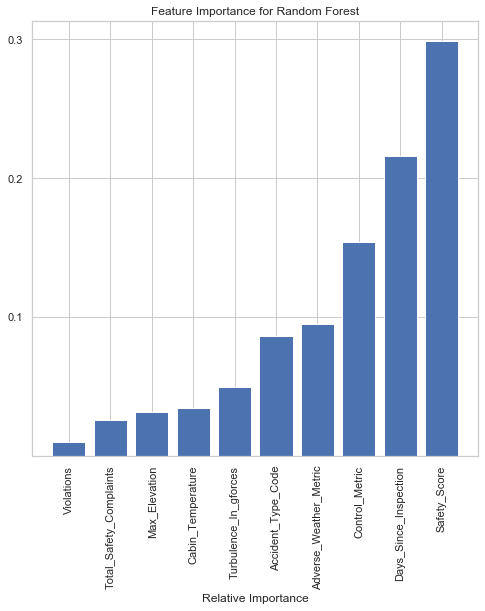

In [16]:
features = X_train.columns
importances = forest.feature_importances_
indices = np.argsort(importances)
y_ticks = [0.1, 0.2, 0.3]

plt.figure(figsize=(8,8))
plt.title('Feature Importance for Random Forest')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(y_ticks)
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation = 90)
plt.xlabel('Relative Importance')
plt.show()

## Results

- The model that performed the best was our Random Forest Model
- In this model, the most important features in predicting the outcome were (in descending order)
    1. Safety Score
    2. Days Since Inspection
    3. Control Metric
    4. Adverse Weather Metric
    5. Accident Type Code
    6. Turbulence
    7. Cabin Temperature
    8. Max Elevation
    9. Total Safety Complaints
    10. Number of Violations

## Conclusion and Further Study 

- Airlines should implement a Random Forest Model to predict which flights might be at risk of an accident 
- To reduce the severity of a crash, the Aviation Safety Network and the Flight Safety Foundation should focus on monitoring the top five predictors:
    1. Safety Score
    2. Days Since Inspection
    3. Control Metric
    4. Adverse Weather Metric
    5. Accident Type Code   
- To further improve flight safety, the ASN and FSF should perform a linear regression to determine what score in the feature categories above is more highly correlated with a more deadly flight and work to implement policies that prevent scores from reaching those numbers